# Sagemath

Get your copy of Sage here: http://www.sagemath.org/. Read [this](http://sagebook.gforge.inria.fr/english.html) book to learn more about using Sage.

## Integration 

Example 1: integration by parts

In [1]:
show(integrate(2*pi*x*atan(x),x))

pi*(x^2*arctan(x) - x + arctan(x))

Example 2: trig sub

In [2]:
show(integrate(x**2/sqrt(5 - 4*x**2),x))

-1/8*sqrt(-4*x^2 + 5)*x + 5/16*arcsin(2/5*sqrt(5)*x)

Example 3: more integration by parts

In [3]:
show(integrate(x**3*sin(x),x))

-(x^3 - 6*x)*cos(x) + 3*(x^2 - 2)*sin(x)

Example 4: trig sub with completing the square

In [4]:
show(integrate(x*sqrt(x**2+2*x+4),x))

1/3*(x^2 + 2*x + 4)^(3/2) - 1/2*sqrt(x^2 + 2*x + 4)*x - 1/2*sqrt(x^2 + 2*x + 4) - 3/2*arcsinh(1/3*sqrt(3)*(x + 1))

Example 5: integration of polynomials

In [5]:
show(integrate(x * (x**2 + 5)**8, x))

1/18*(x^2 + 5)^9

Example 6: a trig integral

In [6]:
show(integrate(sin(x)**5 * cos(x)**2,x))

-1/7*cos(x)^7 + 2/5*cos(x)^5 - 1/3*cos(x)^3

**Note:** both `**` and `^` can be used to indicate powers.

---

To see the help for a function, do:

In [7]:
# ??integrate

## Polynomials and fractions 

In [8]:
A = expand((2*x+1)*(x-3)*(x**2+1))

In [9]:
show(A)

2*x^4 - 5*x^3 - x^2 - 5*x - 3

This should give back the original product:

In [10]:
factor(A)

(x^2 + 1)*(2*x + 1)*(x - 3)

Let's make a rational function:

In [11]:
f(x)=(A/(x**2+4))

We can expand it into a sum:

In [12]:
show(f.expand())

x |--> 2*x^4/(x^2 + 4) - 5*x^3/(x^2 + 4) - x^2/(x^2 + 4) - 5*x/(x^2 + 4) - 3/(x^2 + 4)

Or get the partial fraction decomposition:

In [13]:
show(f.partial_fraction())

x |--> 2*x^2 - 5*x + 3*(5*x + 11)/(x^2 + 4) - 9

## Limits 

Sage knows how to compute limits!

In [14]:
limit(sin(x)/x, x= 0)

1

In [15]:
limit((1-cos(x))/x**2, x=0)

1/2

In [16]:
limit(x*log(x),x=0,dir='+')

0

In [17]:
limit((1+x)**(1/x),x=0)

e

In [18]:
limit(e^x/x,x=oo)    

+Infinity

And occasionally it knows when a limit does not exist, too: 

In [19]:
limit(sin(1/x),x=0)

ind

This function becomes nasty close to $x=0$:

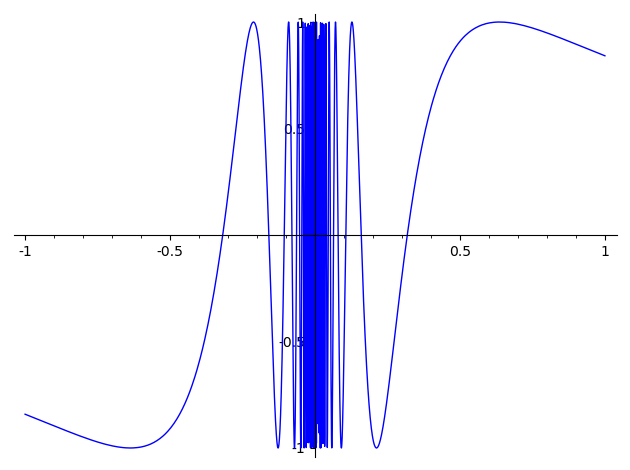

In [20]:
plot(sin(1/x),x)

## Orthogonal trajectory

Obtaining the equation for orthogonal trajectories for the given family of curves. First, we set up some variables and store the equation of our family into `identity`

In [73]:
k = var('k')
y = function('y')(x)
idvar = y == 1/(x+k)

The contents of `identity` are exactly our equation. The `==` means we do not assign the right-hand side to the left-hand side, but rather compare them:

Let's differentiate both sides of this equality with respect to `x`:

In [74]:
diff(idvar,x)

diff(y(x), x) == -1/(k + x)^2

The underscore `_` stands for the previous output.

In [79]:
solve(idvar,k)[0].subs()

k == -(x*y(x) - 1)/y(x)

In [75]:
solve(_,diff(y(x),x))

[diff(y(x), x) == -1/(k^2 + 2*k*x + x^2)]

Let's extract the right-hand side in this list of one element. In Sage, as in Python, `[a,b,c]` denotes a list of the elements `a, b, c`.

In [76]:
RHS = _[0].rhs()

In [81]:
RHS = RHS.subs(k == -(x*y(x) - 1)/y(x))

In [85]:
RHS

-1/(x^2 - 2*(x*y(x) - 1)*x/y(x) + (x*y(x) - 1)^2/y(x)^2)

In [86]:
RHS = RHS.rational_simplify()

Ok, now let's compute the negative inverse of the last output — that will give us the slope of orthogonal trajectories. Then, solve a differential equation with the o.t. slope in the right-hand side:

In [87]:
desolve(diff(y,x) ==  -1/RHS, y, show_method=True)

[1/3*y(x)^3 == _C + x, 'separable']

The following command will make several plots of the orthogonal trajectories for different value of the parameter  \_C. The plots are stored in the list `ot_plots`.

In [92]:
var('x y')

(x, y)

In [257]:
A = 10
ot_plots = [implicit_plot(1/3*y^3 == _C + x, (-A,A), (-A,A), color='magenta') for _C in [k*0.5-8 for k in [1..30]] ]

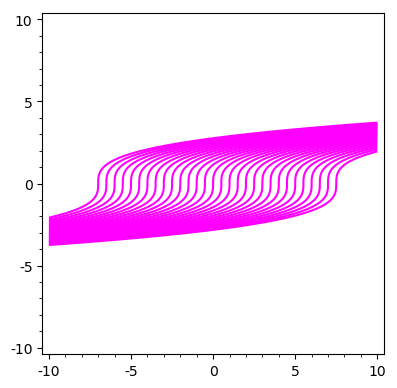

In [258]:
sum(ot_plots)

Make `y` a variable again for the plot.

In [27]:
y = var('y')

Now let's make plots of the original curves. Instead of solving for `y`, we treat them as implicit plots.

In [186]:
A

4

In [230]:
f(x,y,k)=4*x^2+y^2-k^2
orig_plots = [implicit_plot(y == 1/(x+k+0.001),(x,-k,A),(y,-A,A)) for k in srange(-4,10,step=0.5)]
orig_plots1 = [implicit_plot(y == 1/(x+k+0.001),(x,-A,-k-0.1),(y,-A,A)) for k in srange(-4,10,step=0.5)]

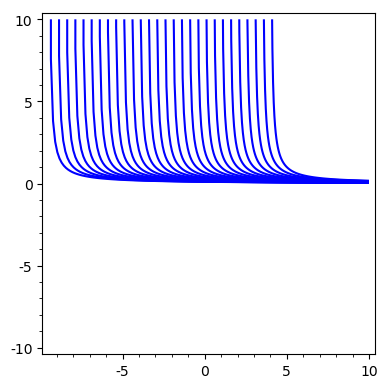

In [231]:
sum(orig_plots)

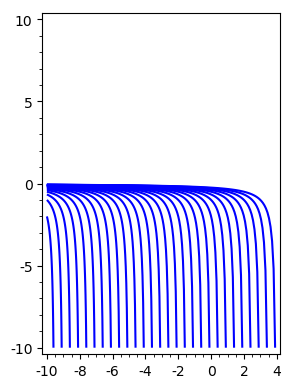

In [232]:
sum(orig_plots1)

Now sum all the plots in the two lists we have built and show them:

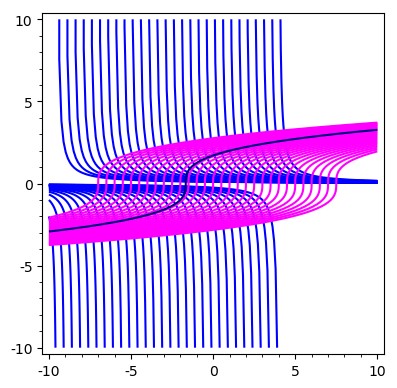

In [259]:
sum(orig_plots1) + sum(orig_plots) + sum(ot_plots)+ implicit_plot(1/3*y^3 == 8/3 -1 + x, (-A,A), (-A,A), color='navy')

The following is a pretty example in Maxima; Sage interface to Maxima seems buggy, as control seems to never go back to Sage?

In [30]:
# maxima('plotdf(-2*x/y,[xfun,"sqrt(x);2*sqrt(x);sqrt(x);3*sqrt(x);-sqrt(x)"], [y,-10,10.1], [x,-10,10])$')

In any case, here is the same example using 'native' Sage:

In [31]:
p1 = plot([sqrt(x),2*sqrt(x),sqrt(x),3*sqrt(x),-sqrt(x)], x, 0, 10)
p2 = plot_vector_field((y,-2*x), (x,-10,10), (y,-10,10))

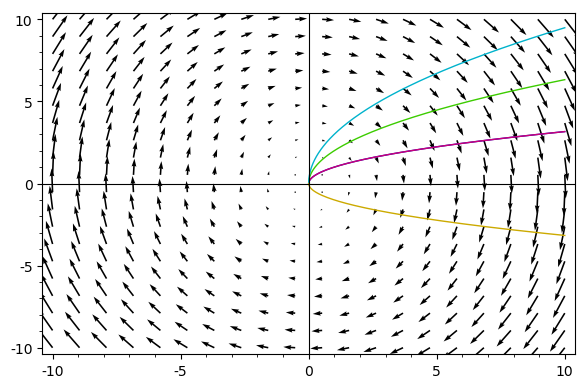

In [32]:
p1+p2

## Plots

In [33]:
y = var('y')

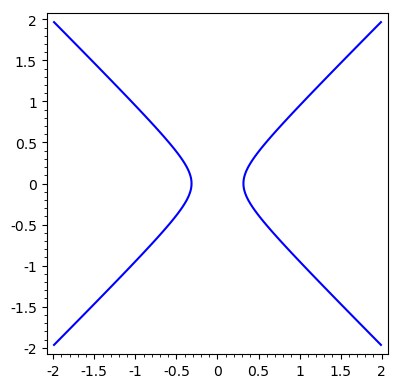

In [34]:
implicit_plot(x^2 - y^2==0.1, (x,-2,2),(y,-2,2))

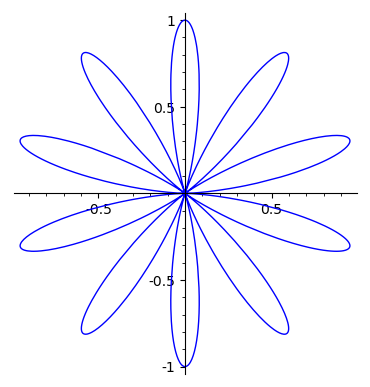

In [35]:
polar_plot(sin(5*x)^2, (x, 0, 2*pi), color='blue')

## Differential equations

In [36]:
x = var('x')
y = function('y')(x)

We will solve an example from the 2nd midterm here.

In [37]:
desolve(diff(y,x)==2*x*sqrt(y), y, show_method=True)

[sqrt(y(x)) == 1/2*x^2 + _C, 'separable']

Ok, so that gives us a generic solution of the equation; to incorporate the initial condition $ y(3) = 4 $, we use the `ics` keyword:

In [38]:
deq = desolve(diff(y,x)==2*x*sqrt(y), y, ics=[3,4], show_method=True)

The answer becomes:

In [39]:
deq

[sqrt(y(x)) == 1/2*x^2 - 5/2, 'separable']

So we know the value of the constant as well. In order to obtain solution as an explicit function of $x$, we can solve the identity that is the first element of the list `deq` for `y(x)`, as we did previously for the orthogonal trajectory. You can go ahead and try this:

In [40]:
# solve(deq[0], y(x))

Sage will complain because it does not want to square both sides of this equation without knowing the sign of `x^2 - 5`. To fix this, let's make the following assumption:

In [41]:
assume(x^2>5)

This now gives the answer we wanted:

In [42]:
solve(deq[0], y(x))

[y(x) == 1/4*x^4 - 5/2*x^2 + 25/4]

Logistic model in Maxima (can freeze Sage indefinitely):

In [43]:
# maxima('plotdf(0.08*P*(1-P/1e3), [t,P],[P,0,1400], [t,0,80], [xfun,"1000"])$')

Logistic with minimal population in Maxima (can freeze Sage indefinitely):

In [44]:
# maxima('plotdf(0.08*P*(1-P/1e3)*(1-2e2/P), [t,P],[P,0,1400], [t,0,80], [xfun,"1000; 200"])$');

## Review key examples

Arclength of a Cartesian and a parametric curve:

In [45]:
def arclen(f,x,a,b):
    return integrate(sqrt(1+diff(f,x)**2), (x,a,b))

def arclen_t(f,g,t,a,b):
    return integrate(sqrt(diff(f,t)**2+diff(g,t)**2), (t,a,b))

Areas of surfaces of revolution, obtained by rotating $y = f(x)$ around the x and y axes:

In [46]:
def revsurf_x(f,x,a,b):
    return integrate(2*pi*f(x)*sqrt(1+diff(f,x)**2), (x,a,b))

def revsurf_y(f,x,a,b):
    return integrate(2*pi*x*sqrt(1+diff(f,x)**2), (x,a,b))

Area of a surface of revolution, obtained by rotating a parametric curve:

In [47]:
def revsurf_tx(f,g,t,a,b):
    return integrate(2*pi*g(t)*sqrt(diff(f,t)**2+diff(g,t)**2), (t,a,b))

def revsurf_ty(f,g,t,a,b):
    return integrate(2*pi*f(t)*sqrt(diff(f,t)**2+diff(g,t)**2), (t,a,b))

Area under the curve $y=f(x)$, and coordinates of the centroid of a region, bounded by $y=0$, $y=f(x)$, and the two lines $x=a$, $x=y$.

In [48]:
def area(f,x,a,b):
    return integrate(f(x), (x,a,b))

def xbar(f,x,a,b):
    return integrate(x*f(x), (x,a,b))/area(f,x,a,b)

def ybar(f,x,a,b):
    return integrate(f(x)^2/2, (x,a,b))/area(f,x,a,b)

The same as above, but the region now lies between two curves $y=f(x)$ (upper) and $y = g(x)$ (lower), and the two lines $x=a$, $x=y$.

In [49]:
def area2(f,g,x,a,b):
    return integrate(f(x)-g(x), (x,a,b))

def xbar2(f,g,x,a,b):
    return integrate(x*(f(x)-g(x)), (x,a,b))/area2(f,g,x,a,b)

def ybar2(f,g,x,a,b):
    return integrate((f(x)^2 - g(x)^2)/2, (x,a,b))/area2(f,g,x,a,b)

**Question:** what changes are necessary in the above code to make it work regardless of whether $f(x)$ is the upper or the lower curve?